In [2]:
# импорт библиотек
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
housing = fetch_california_housing()


# 8 Деревья решений

In [27]:
# print(fetch_california_housing().DESCR)

## Анализ массива

### загрузка данных

In [3]:
target = pd.DataFrame(pd.Series(housing.target), columns=housing.target_names)
features = pd.DataFrame(housing.data, columns=housing.feature_names)
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


### проверка наличия пропусков в массиве

In [5]:
for col in features.columns:
    if features[col].isnull().sum():
        raise print(f"из None column {col}", features[col].isnull().sum())

### нормализация признака `MedInc`

In [6]:
scaler = StandardScaler()
features['MedInc_normalized'] = scaler.fit_transform(features[['MedInc']])

In [7]:
features[['MedInc_normalized', 'MedInc']].head(5)

,MedInc_normalized,MedInc
0,2.344766,8.3252
1,2.332238,8.3014
2,1.782699,7.2574
3,0.932968,5.6431
4,-0.012881,3.8462


### разделение выборки `80` на `20`

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [10]:
r2_score = linear_regression_model.score(X_test, y_test)
print(f"score модели: {r2_score:.2f}")

score модели: 0.58


## Дерево решений

In [11]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model_score = decision_tree_model.score(X_test, y_test)
print(f"Оценка (score) модели дерева решений: {decision_tree_model_score:.2f}")

Оценка (score) модели дерева решений: 0.61


### Визуализация дерева решений

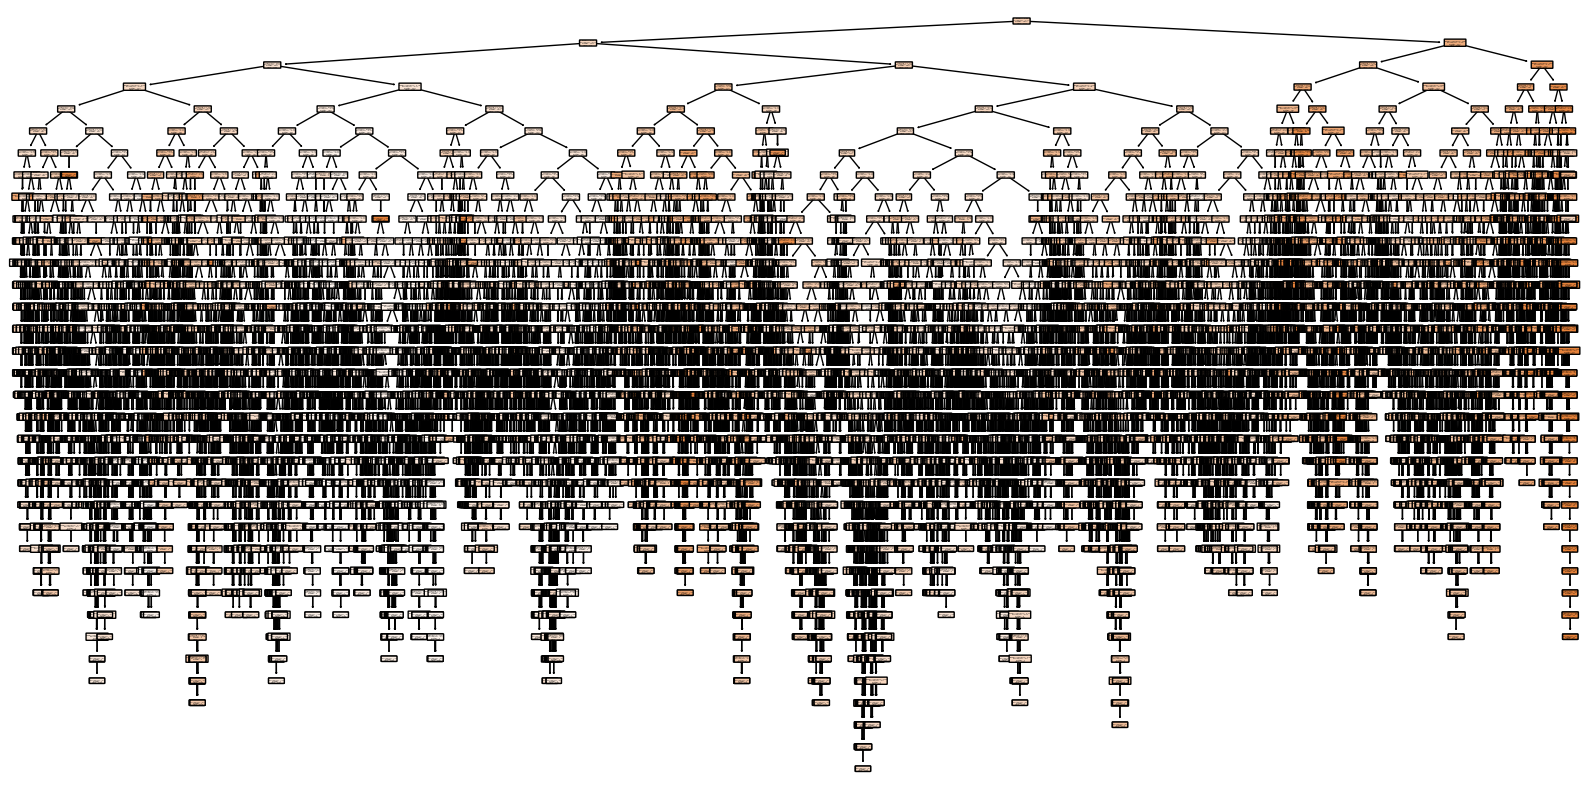

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, 
          feature_names=X_train.columns,  
          filled=True, 
          rounded=True)
plt.show()

🤪 Трэш больше 8 минут только построение графика, не говоря уже о глубине модели

### Оптимизация глубины дерева решений

In [12]:
max_depth = 5
decision_tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model_score = decision_tree_model.score(X_test, y_test)
print(f"Оценка (score) модели дерева решений с максимальной глубиной {max_depth}: {decision_tree_model_score:.2f}")

Оценка (score) модели дерева решений с максимальной глубиной 5: 0.60


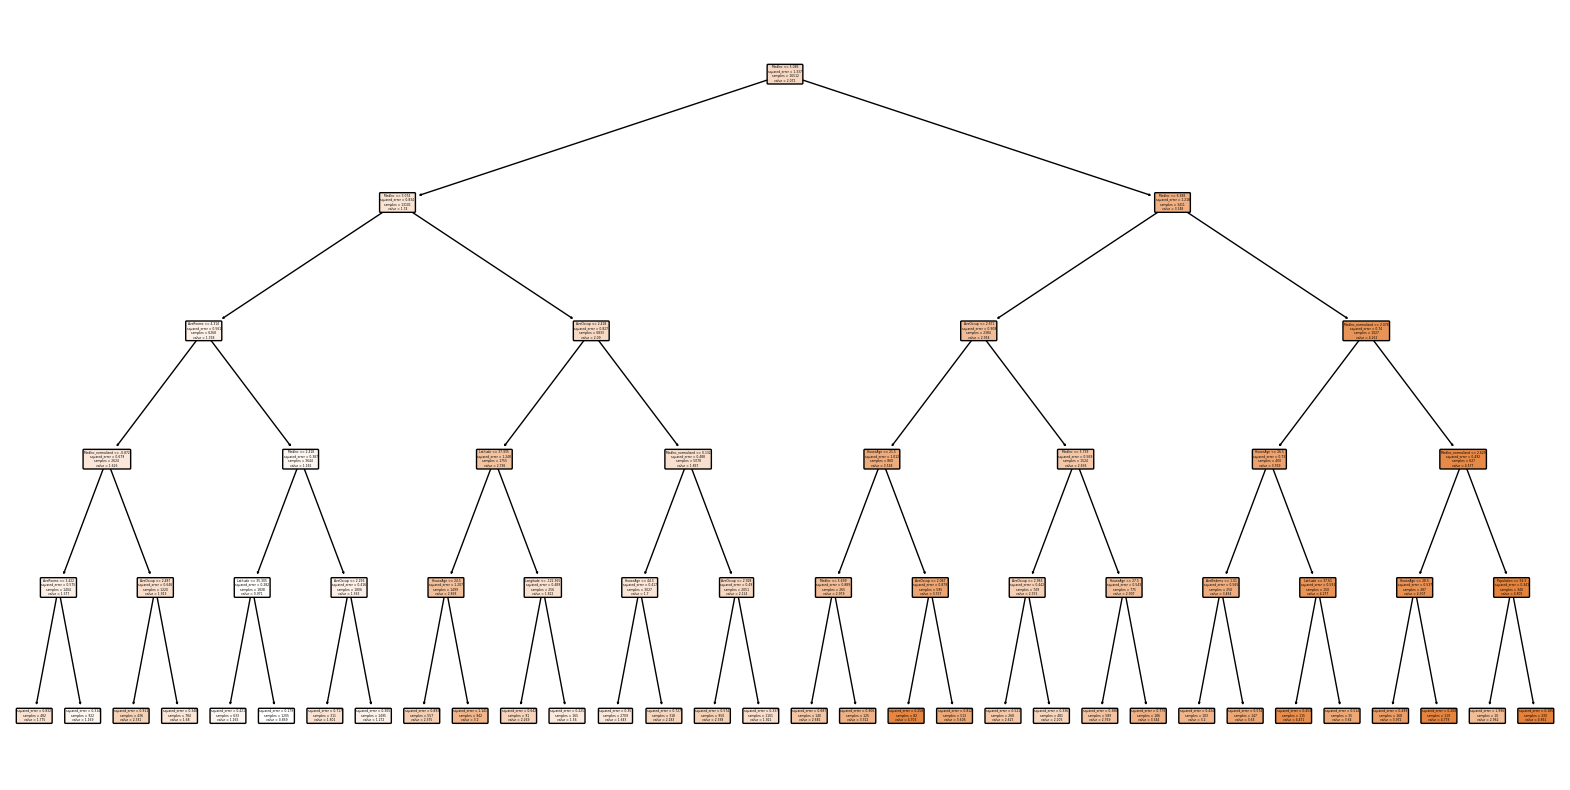

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, 
          feature_names=X_train.columns,  
          filled=True, 
          rounded=True)
plt.show()

### Попытка найти оптимальный `score` для определенной глубины

In [79]:
max_depth_values = [3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
best_score = -1
best_max_depth = None

for max_depth in max_depth_values:
    decision_tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    decision_tree_model.fit(X_train, y_train)
    score = decision_tree_model.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_max_depth = max_depth

print(f"Оптимальная глубина дерева: {best_max_depth}")
print(f"Оценка (score) модели с оптимальной глубиной: {best_score:.2f}")

Оптимальная глубина дерева: 9
Оценка (score) модели с оптимальной глубиной: 0.69


In [15]:
max_depth = 9
decision_tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model_score = decision_tree_model.score(X_test, y_test)
print(f"Оценка (score) модели дерева решений с максимальной глубиной {max_depth}: {decision_tree_model_score:.2f}")

Оценка (score) модели дерева решений с максимальной глубиной 9: 0.69


### оптимизация еще одного параметра

In [19]:
X_train['AveRooms_normalized'] = scaler.fit_transform(X_train[['AveRooms']])
X_test['AveRooms_normalized'] = scaler.fit_transform(X_test[['AveRooms']])

In [20]:
max_depth_values = [3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
best_score = -1
best_max_depth = None

for max_depth in max_depth_values:
    decision_tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    decision_tree_model.fit(X_train, y_train)
    score = decision_tree_model.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_max_depth = max_depth

print(f"Оптимальная глубина дерева: {best_max_depth}")
print(f"Оценка (score) модели с оптимальной глубиной c оптимизацией еще одного параметра AveRooms: {best_score:.2f}")

Оптимальная глубина дерева: 9
Оценка (score) модели с оптимальной глубиной c оптимизацией еще одного параметра AveRooms: 0.69


### Вывод

1. `LinearRegression` выдает `score` `0.58` при этом `DecisionTreeRegressor` значительно превосходит данный показатель
2. `DecisionTreeRegressor` без определения глубины, явно переобучилась и выдает очень глубокое дерево, которое очевидно пытается учесть все частные случаи, что негативно отразиться на `train` и последующем `prod` `score` `0.61`
3. После установления глубины `5` модель выдает `score` равный `0.60` но он носит более общий характер
4. При поиске оптимального `score` модель была определена глубина `9` при которой `score` `0.69`
5. После регуляризации дополнительного параметра `AveRooms` `score` остался на том же уровне